# Introducción

El objetivo de esta práctica es mostrar al alumno las posibilidades que ofrece R para analizar datos de distintas fuentes diferentes, extraer datos, comparar, hacer gráficas y sacar estadísticos.

Las fuentes de datos que se tienen son:
* Datos meteorológicos de Praga de 1775 hasta 2004: https://www.ncdc.noaa.gov/cdo-web/datasets
* Banco mundial: https://data.worldbank.org/topic/climate-change
* Nivel de CO2 en la atmósfera (Mauna Loa): https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

Todos los ficheros necesarios para resolver la práctica se ofrecen como adjuntos.

## Datos meteorológicos NOAA

Carga el tiempo meteorológico de Praga en un data.frame. Fichero: *EZE00100082*

In [1]:
weatherPraga<-read.csv("./datos/EZE00100082.csv", sep = ",")
head(weatherPraga)

STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,⋯,HTDD,HTDD_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
EZE00100082,1775,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",246.3,NA,246.3,E,⋯,NA,,NA,,10.55,E,13.64,E,7.46,E
EZE00100082,1776,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",114.6,NA,114.6,E,⋯,3481.8,E,NA,,8.53,E,11.72,E,5.34,E
EZE00100082,1777,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",62.6,NA,62.6,E,⋯,3628.0,E,NA,,8.67,E,11.76,E,5.58,E
EZE00100082,1778,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",188.4,NA,188.4,E,⋯,3330.2,E,NA,,9.91,E,13.17,E,6.65,E
EZE00100082,1779,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",109.5,NA,109.5,E,⋯,3216.0,E,NA,,10.23,E,13.64,E,6.82,E
EZE00100082,1780,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",94.5,NA,94.5,E,⋯,3344.6,E,NA,,8.64,E,11.93,E,5.34,E


Mostrar los 10 años que más precipitiaciones han tenido junto con su valor correspondiente (columna PRCP):

In [2]:
precipitationsByYear <- weatherPraga[,c("DATE","PRCP")]
precipitationsByYearOrder <- precipitationsByYear[order(-precipitationsByYear$PRCP),]
head(precipitationsByYearOrder,10)

,DATE,PRCP
165,1939,745.5
54,1828,665.4
228,2002,661.5
172,1946,638.3
116,1890,637.3
63,1837,634.9
184,1958,633.1
57,1831,625.7
192,1966,624.1
55,1829,622.4


* Muestra en un diagrama de dispersión la temperatura mínima registrada en un año (columna EMNT) en función del año registrado (columna DATE).
* Crear una regresión lineal (polinomio orden 1) que muestre la tendencia. Pintarla sobre el diagrama de dispersión.
* En media, ¿Cuantos grados ha aumentado la temperatura mínima cada año? (pendiente de la  regresión lineal)


Call:
lm(formula = weatherPraga$EMNT ~ weatherPraga$DATE, data = weatherPraga)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6098  -4.0003   0.5335   3.2636  11.2083 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -48.00664    9.17007  -5.235 3.74e-07 ***
weatherPraga$DATE   0.01738    0.00485   3.582 0.000416 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.884 on 228 degrees of freedom
Multiple R-squared:  0.05329,	Adjusted R-squared:  0.04913 
F-statistic: 12.83 on 1 and 228 DF,  p-value: 0.0004162


[1] "La temperatura mínima ha aumentado:  0.0173750305134395"


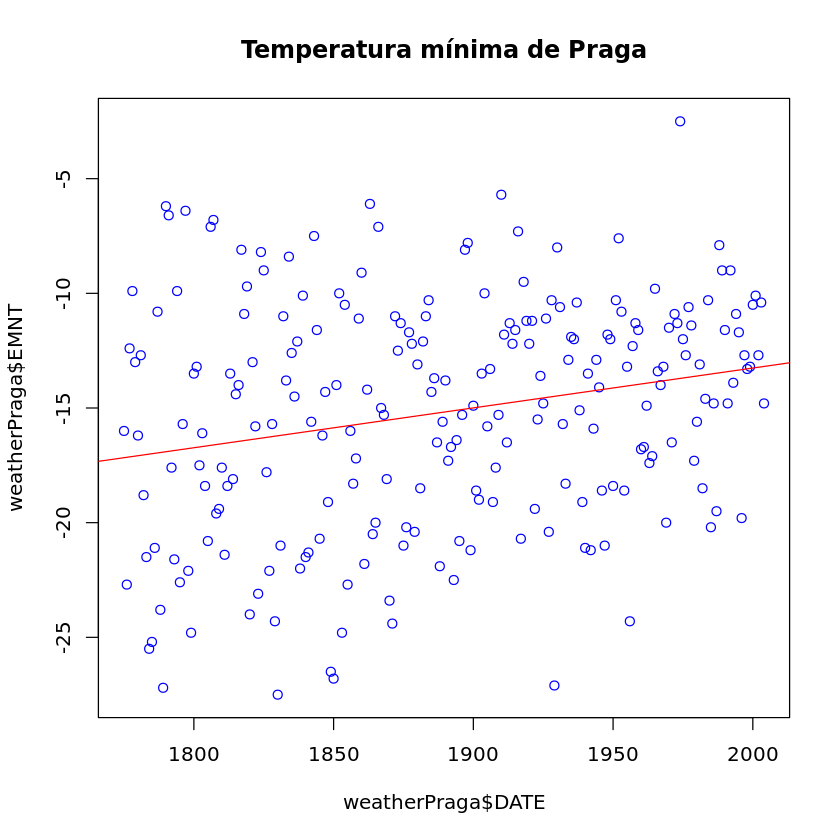

In [3]:
library("ggplot2")

plot(weatherPraga$DATE,weatherPraga$EMNT,col="blue", main="Temperatura mínima de Praga")
model<-lm(data=weatherPraga, formula = weatherPraga$EMNT ~ weatherPraga$DATE)
abline(model$coefficients,col="red")

summary(model)
print(paste("La temperatura mínima ha aumentado: ",model$coefficients[2]))

¿Ha subido realmente la temperatura mínima?
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794]
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004]
* ¿Cual es la diferencia entre ambos? ¿Es estadísticamente significativa?
  * Nota: antes de aplicar un test estadístico hay que ver si cumple con los requisitos de ese test.

In [4]:
MinTemperaturesByYear <- weatherPraga[,c("DATE","EMNT")]
MinTemperaturesBy1775_1794 <- MinTemperaturesByYear[MinTemperaturesByYear$DATE>=1775 & MinTemperaturesByYear$DATE<=1794,]
MinTemperaturesBy1985_2004 <- MinTemperaturesByYear[MinTemperaturesByYear$DATE>=1985 & MinTemperaturesByYear$DATE<=2004,]
media1775_1794 <- (mean(MinTemperaturesBy1775_1794$EMNT, na.rm=T))
media1985_2004 <- (mean(MinTemperaturesBy1985_2004$EMNT, na.rm=T))
print(paste("La media de la temperatura mínima entre 1775 y 1794 es: ",media1775_1794))
print(paste("La media de la temperatura mínima entre 1985 y 2004 es: ",media1985_2004))
print(paste("La diferencia entre las medias es: ", (media1985_2004 - media1775_1794)))
if (media1985_2004 > media1775_1794) {
    print("Aparentemente ha subido la temperatura media")                   
} else {
    print("Aparentemente NO ha subido la temperatura media")
}

[1] "La media de la temperatura mínima entre 1775 y 1794 es:  -16.935"
[1] "La media de la temperatura mínima entre 1985 y 2004 es:  -13.04"
[1] "La diferencia entre las medias es:  3.895"
[1] "Aparentemente ha subido la temperatura media"


#### Ahora tenemos que comprobar si es estadísticamente siginificativo

Realizo algunos gráficos para ver la distribución que siguen las muestras

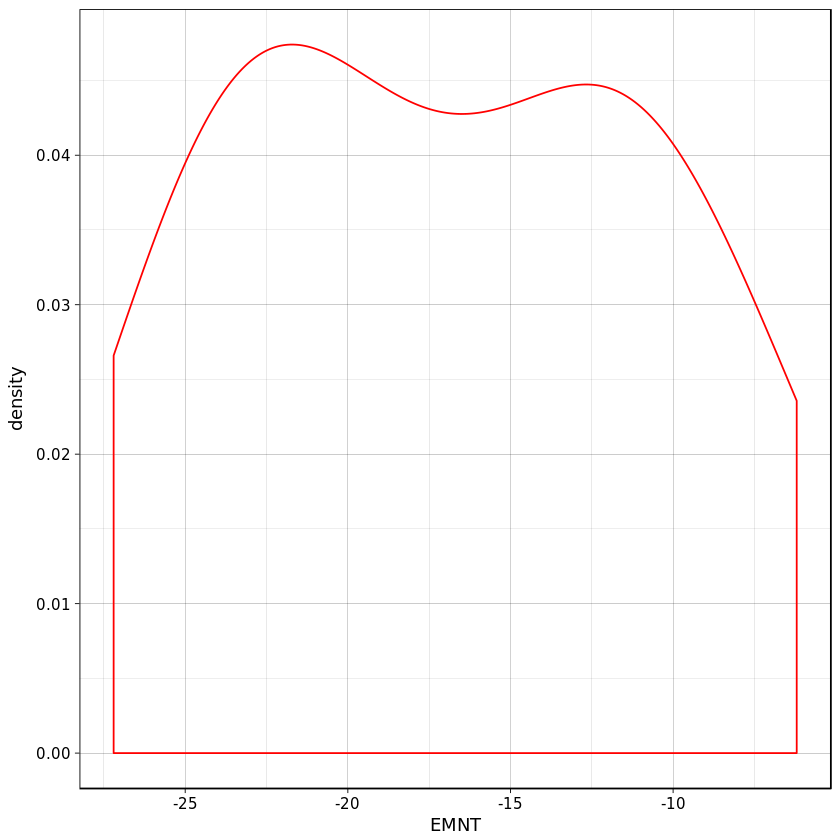

In [5]:
ggplot(data=MinTemperaturesBy1775_1794,aes(x=EMNT))+
    geom_density(color="red")+
    theme_linedraw()

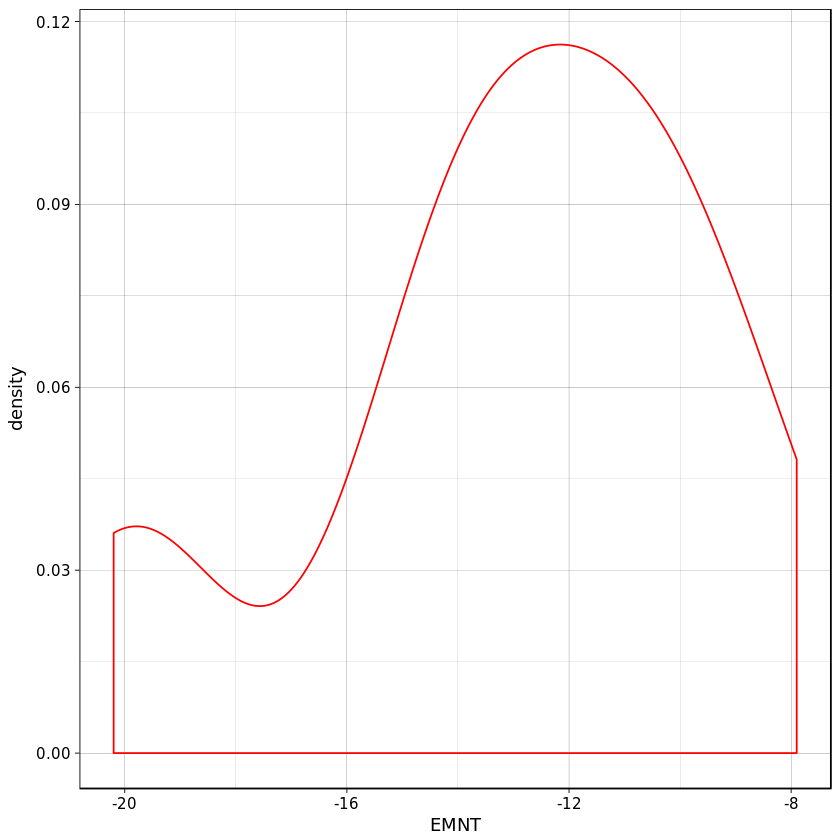

In [6]:
ggplot(data=MinTemperaturesBy1985_2004,aes(x=EMNT))+
    geom_density(color="red")+
    theme_linedraw()

A simple vista sí que podrían encajar en una distribución normal, ejecuto el test de shapiro para comprobarlo.

In [7]:
shapiro.test(MinTemperaturesBy1775_1794$EMNT)
shapiro.test(MinTemperaturesBy1985_2004$EMNT)


	Shapiro-Wilk normality test

data:  MinTemperaturesBy1775_1794$EMNT
W = 0.95089, p-value = 0.3808



	Shapiro-Wilk normality test

data:  MinTemperaturesBy1985_2004$EMNT
W = 0.91373, p-value = 0.0751


**Parece que siguen una gaussiana, aplico el test unilateral** (derecho). Hipótesis:

* $H_0$ : La temperatura media es **menor o igual** en el periodo de 1985 - 2004 que en el periodo 1775 - 1794 
* $H_1$ : La temperatura media es **mayor** en el periodo de 1985 - 2004 que en el periodo 1775 - 1794 

In [8]:
tw<-t.test(MinTemperaturesBy1985_2004$EMNT,MinTemperaturesBy1775_1794$EMNT,alternative = "greater")
tw 


	Welch Two Sample t-test

data:  MinTemperaturesBy1985_2004$EMNT and MinTemperaturesBy1775_1794$EMNT
t = 2.3499, df = 29.351, p-value = 0.01285
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 1.079811      Inf
sample estimates:
mean of x mean of y 
  -13.040   -16.935 


El valor de pvalor es lo suficientemente pequeño como para rechazar la hipótesis nula, por lo que podemos concluir que hay evidencias estadísticas como para afirmar que la temperatura media ha subido.

## Datos banco mundial

Carga los datos del banco mundial

In [9]:
databank<-read.csv("./datos/API_19_DS2_en_csv_v2.csv",skip=4)
#Borramos las X del nombre de la columna
colnames(databank)<-gsub("X","",colnames(databank))

countryData<-read.csv("./datos/Metadata_Country_API_19_DS2_en_csv_v2.csv")

# De esta forma podremos aceder a la información de paises usando su countryCode
rownames(countryData)<-countryData$Country.Code

realCountryData<-subset(countryData,IncomeGroup!="")
regionData<-subset(countryData,IncomeGroup=="")
print(paste("Tenemos un total de",nrow(realCountryData),"paises"))
print(paste("Tenemos un total de",nrow(regionData),"regiones"))
indicators<-read.csv("./datos/Metadata_Indicator_API_19_DS2_en_csv_v2.csv")
print(paste("Tenemos un total de",nrow(indicators),"indicadores"))

[1] "Tenemos un total de 217 paises"
[1] "Tenemos un total de 46 regiones"
[1] "Tenemos un total de 80 indicadores"


¿Cual fue el país que más toneladas de CO2 equivalente emitió en 1970 (Mostrar *Country.Name*)?
¿Cuanto contaminó?

Hay una dataframe con la lista de pasises en *realCountryData*
El número de toneladas de CO2 equivalente viene dado por el Indicator.Code *"EN.ATM.GHGT.KT.CE"*


In [10]:
databankCO2 <- databank[databank$Indicator.Code=="EN.ATM.GHGT.KT.CE",]
realCountryDataCO2 <- merge(realCountryData, databankCO2, by="Country.Code")
print(paste("El país que más toneladas de CO2 equivalente emitió en 1970 fue", 
            realCountryDataCO2[which.max(realCountryDataCO2$"1970"),"Country.Name"]))
print(paste("Contaminó",max(realCountryDataCO2$"1970",na.rm = TRUE),"kt"))


[1] "El país que más toneladas de CO2 equivalente emitió en 1970 fue United States"
[1] "Contaminó 5400503.5 kt"


¿Cuales fueron los 5 países que más toneladas de CO2 equivalente emitieron en 2012? ¿Cuantas kt emitieron?

Nota: Este indicador nos da los valores en kt por lo que no es necesario hacer ninguna transformación

In [11]:
realCountryDataCO2By2012Order <- realCountryDataCO2[order(-realCountryDataCO2$"2012"),]
for (i in 1:5)
    print(paste(realCountryDataCO2By2012Order[i,"Country.Name"], "emitió", realCountryDataCO2By2012Order[i,"2012"],"kt"))

[1] "China emitió 12454710.6051 kt"
[1] "United States emitió 6343840.50774614 kt"
[1] "India emitió 3002894.92752695 kt"
[1] "Brazil emitió 2989417.95671697 kt"
[1] "Russian Federation emitió 2803398.4879042 kt"


¿Cual ha sido la media del **porcentaje** de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012?

In [12]:
library(reshape2)
#Aunque el paquete psych incluye una función geometric.mean hago una implementación manual(de lo visto en clase) por no instalarlo, 
#porque en principio se comentó que no necesitaríamos ningún paquete adicional, aunque se podría haber echo con la función 
#construida (geometric.mean) de ese paquete
myGeometricMean<-function(X,na.rm=F){
    if (na.rm){
        X<-na.omit(X)
    }
    m<-1
    for (xi in X){
        m<-m*xi        
    }
    m^(1/length(X))
}
dataCO2China2000_2012 <- realCountryDataCO2[realCountryDataCO2$Country.Code == "CHN",
                                                       c("2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012")]

dataCO2China2000_2012ByYear <- melt(dataCO2China2000_2012, value.name="CO2")
ratios <- c(NA, round(dataCO2China2000_2012ByYear[2:nrow(dataCO2China2000_2012ByYear), "CO2"]/dataCO2China2000_2012ByYear[1:nrow(dataCO2China2000_2012ByYear) - 1, "CO2"],4))
percentages <-round((ratios-1)*100,2)
dataCO2China2000_2012ByYear$ratio <- ratios
dataCO2China2000_2012ByYear$percentage <- percentages
mediaCrecimientoCO2 <- (myGeometricMean(dataCO2China2000_2012ByYear$ratio,na.rm=T)-1)*100
print(paste("La media del porcentaje de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012 es",round(mediaCrecimientoCO2,2),"%"))


No id variables; using all as measure variables


[1] "La media del porcentaje de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012 es 7.76 %"


Compara las emisiones de CO2(kt) per cápita (clave en Indicator.Code: *EN.ATM.CO2E.PC*) de todos los paises en 1960,1990 y 2014 mediante:
* diagrama de cajas
* histograma
* curvas de densidad

In [13]:
#Primero preparo los datos antes de ponerme a pintar los gráficos
databankCO2PC <- databank[databank$Indicator.Code=="EN.ATM.CO2E.PC",]
realCountryDataCO2PC <- merge(realCountryData, databankCO2PC, by="Country.Code")
realCountryDataCO2PC1960_1990_2014 <- realCountryDataCO2PC[,c("Country.Name","1960","1990","2014")]
dataCO2PC <- melt(realCountryDataCO2PC1960_1990_2014,id=c("Country.Name"),na.rm=T)

In [14]:
head(dataCO2PC)

,Country.Name,variable,value
2,Afghanistan,1960,0.0460599
3,Angola,1960,0.0974716
4,Albania,1960,1.2581949
6,United Arab Emirates,1960,0.1187577
7,Argentina,1960,2.3674730
10,Antigua and Barbuda,1960,0.6626430


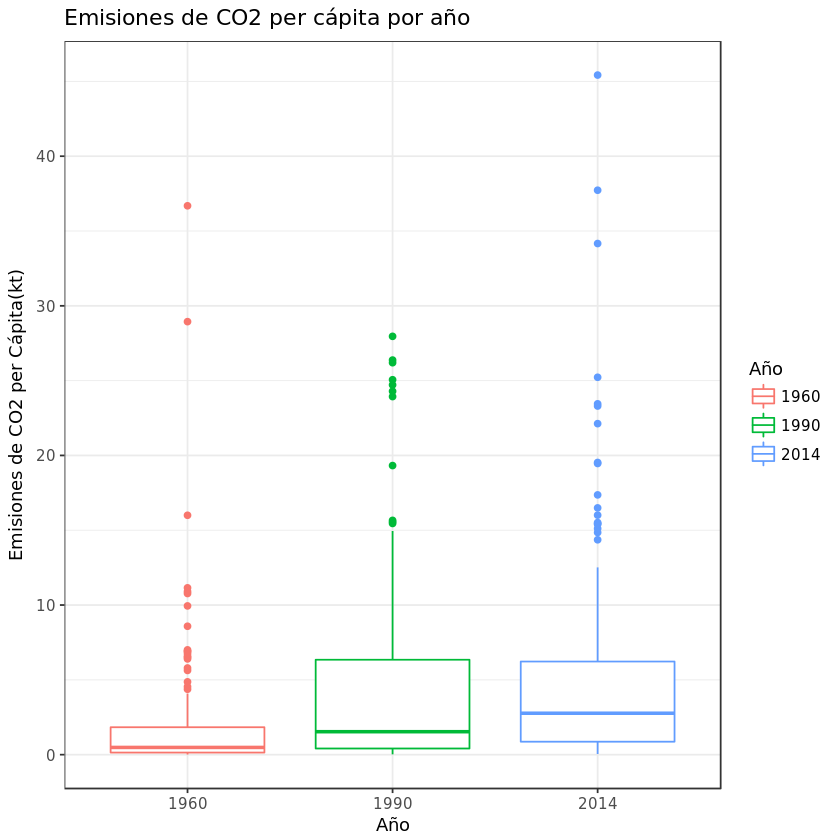

In [15]:
#Diagrama de cajas 
ggplot(dataCO2PC,aes(x=dataCO2PC$variable,y=dataCO2PC$value,color=dataCO2PC$variable))+geom_boxplot()+
labs(title ="Emisiones de CO2 per cápita por año", x = "Año", y = "Emisiones de CO2 per Cápita(kt)",color="Año")+
theme_bw()


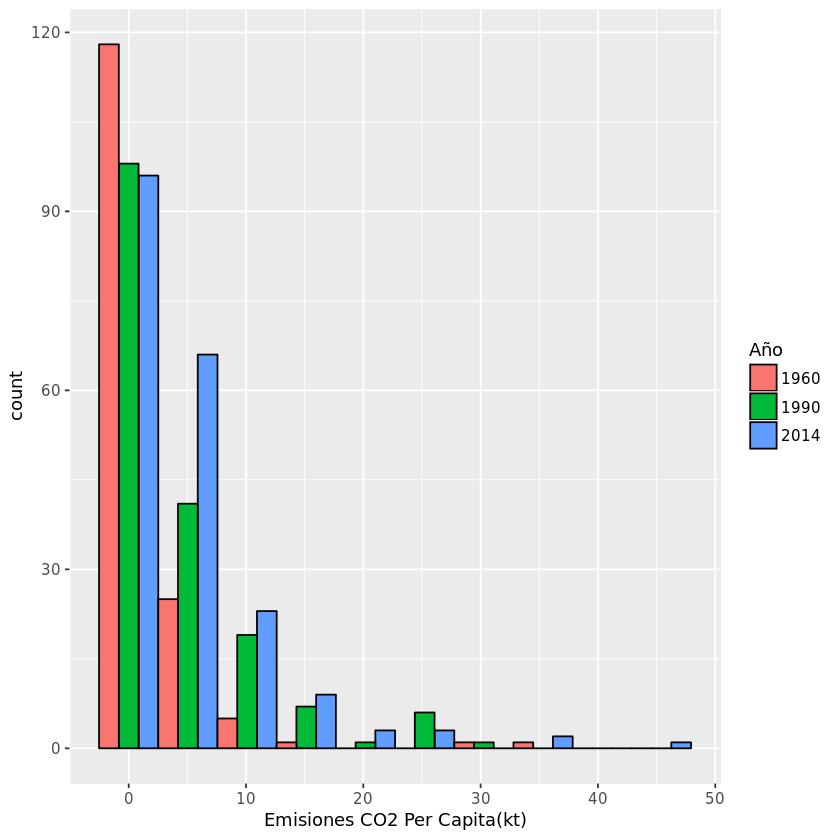

In [16]:
# Histograma
ggplot(data=dataCO2PC, aes(x=dataCO2PC$value,fill=dataCO2PC$variable)) + 
geom_histogram(color="black",bins = 10, position="dodge")+xlab("Emisiones CO2 Per Capita(kt)")+labs(fill="Año")

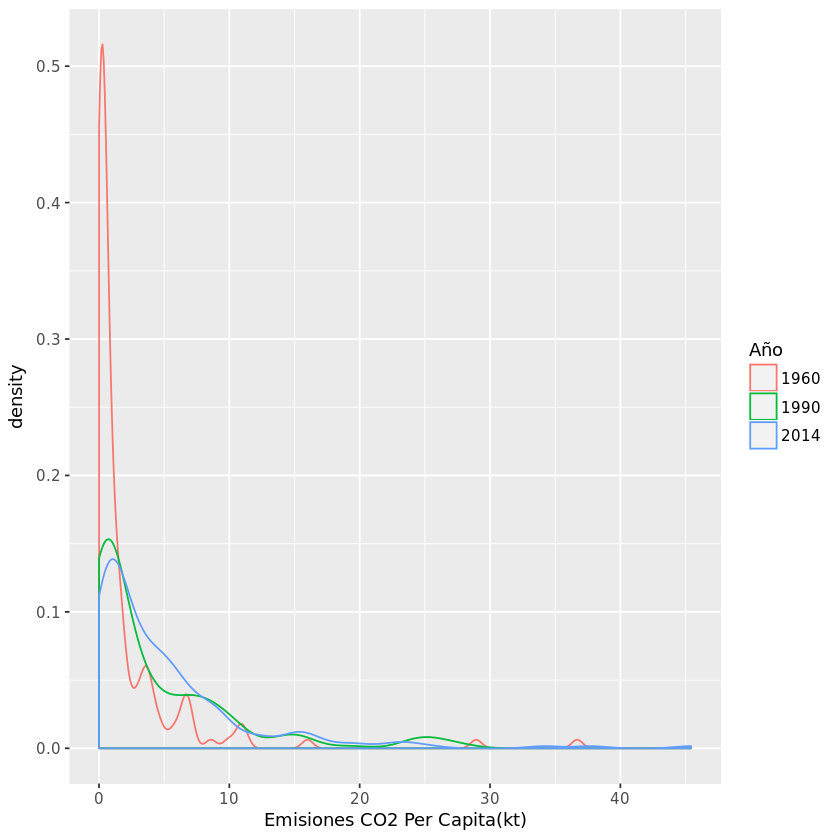

In [17]:
#Curvas de densidad
ggplot(data=dataCO2PC, aes(x=dataCO2PC$value,color=dataCO2PC$variable)) + 
    geom_density()+xlab("Emisiones CO2 Per Capita(kt)")+labs(color="Año")

Utilizando ggplot: Compara en una gráfica las emisiones totales de CO2(kt) en función del año de las siguientes regiones:
* Mundo entero: WLD
* Unión europea: EUU
* Africa subsahariana: SSA
* Norteamérica: NAC
* Este de Asia y pacífico: TEA

Ayuda: Tendrás que usar la función *melt()* para transformar los años, cada año en una columna, en un data.frame donde cada uno esté en una fila.

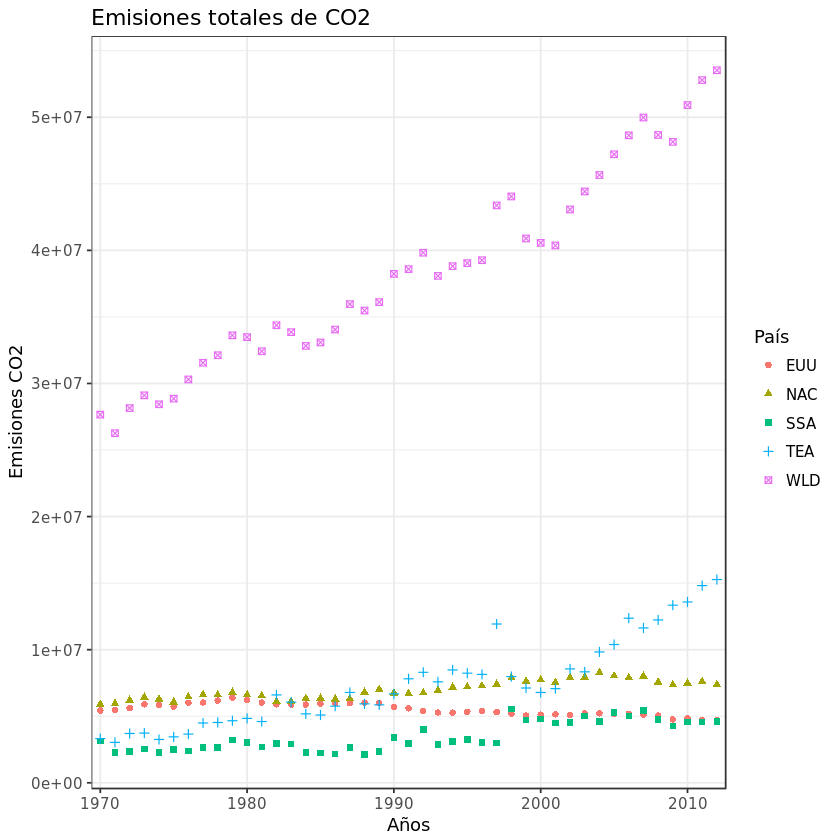

In [18]:
regionDataCO2 <- merge(regionData, databankCO2, by="Country.Code")
regionDataCO2SubSet <- subset(regionDataCO2, Country.Code=="WLD" | Country.Code=="EUU" | Country.Code=="SSA" | Country.Code=="NAC" | Country.Code=="TEA")
years <- paste("", 1960:2017,sep="")
cols <- c("Country.Code", years)
regionDataCO2SubSet <- regionDataCO2SubSet[, cols]
regionDataCO2SubSet <- melt(regionDataCO2SubSet,id=c("Country.Code"), na.rm=T)
escala <- c(1960,1970,1980,1990,2000,2010)
ggplot(data=regionDataCO2SubSet,aes(x=variable,y=value,color=Country.Code,shape=Country.Code))+geom_point(size=1.5)+
    scale_x_discrete(breaks=escala,labels=escala)+    
    theme_bw()+labs(title="Emisiones totales de CO2", x = "Años", y="Emisiones CO2",color="País",shape="País")


Suponiendo que la tendencia se mantiene, es decir, que no se aplica ninguna política a nivel global de reducción de emisiones de CO2, ¿cual sería el total de emisiones de CO2 en todo el mundo en el año 2020?

Para calcularlo utiliza tres modelos lineales:
* Regresión lineal con polinomio grado 1
* Regresión lineal polinomio grado 3
* Regresión lineal polinomio grado 10

Represénta en una gráfica el valor real y el calculado por cada uno de los 3 modelos.

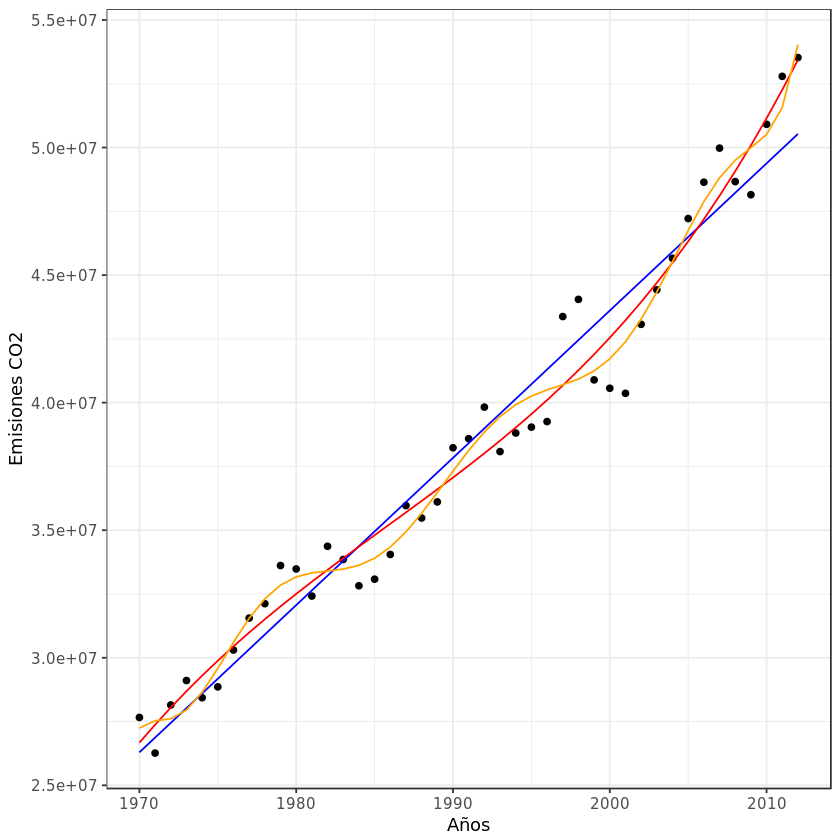

In [19]:
wldCO2 <- subset(regionDataCO2SubSet, Country.Code == "WLD", na.rm=T)
wldCO2$years <- as.numeric(levels(wldCO2$variable))[wldCO2$variable]
model1<-lm(data=wldCO2, formula = value ~ years)
wldCO2$yPredictModel1 <- predict(model1,wldCO2)
model3<-lm(data=wldCO2, formula = value ~ poly(years,3))
wldCO2$yPredictModel3 <- predict(model3,wldCO2)
model10<-lm(data=wldCO2, formula = value ~ poly(years,10))
wldCO2$yPredictModel10 <- predict(model10,wldCO2)
ggplot(data=wldCO2,aes(x=years))+geom_point(aes(y=value))+geom_line(aes(y=yPredictModel1),color="blue")+
    geom_line(aes(y=yPredictModel3), color="red")+
    geom_line(aes(y=yPredictModel10), color="orange")+    
    theme_bw()+xlab("Años")+ylab("Emisiones CO2")

## Nivel de CO2

En esta parte vamos a trabajar con el nivel medio de CO2 medido por el NOAA en Manuna Loa (Hawai) desde 1968.

In [20]:
co2ppm<-read.csv("./datos/co2_mm_mlo.txt",skip=73,sep="",header = F, 
                 col.names= c("year","month","date","average","interpolated","trend","days"))

Representa el diagrama de dispersión entre:
* CO2 medido en la atmósfera (co2ppm\$interpolated)
* CO2 emitido por todos los países (databank con Indicator.Code=="EN.ATM.CO2E.KT" y Country.Code=="WLD"?

¿Cual es su correlación?


Nota: 

* Los valores en co2ppm vienen en meses, habrá que agregarlos, calcular la media anual a partir de los meses para así poder hacer la correlación con databank.
* Los valores en databank vienen en columnas, habrá que pasarlos a filas utilizando la función *melt*.

No id variables; using all as measure variables
Warning message:
“Removed 5 rows containing missing values (geom_point).”

[1] "La correlación es 0.98455784385784 por lo que podemos concluir que están altamente correladas"


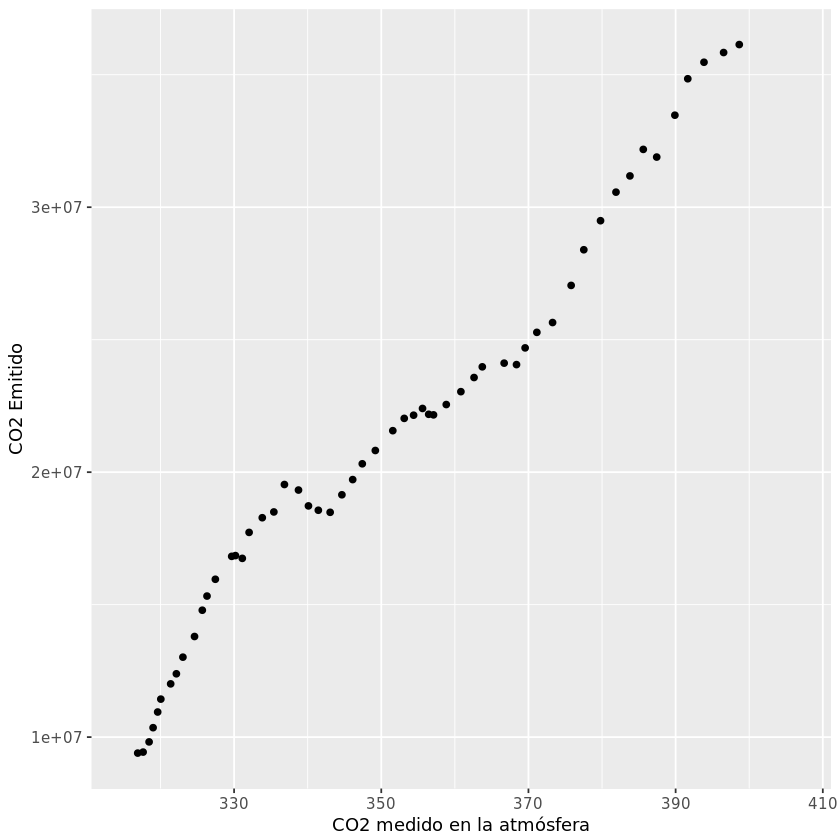

In [22]:
databankCO2Emitido <- databank[databank$Indicator.Code=="EN.ATM.CO2E.KT",]
regionDataCO2Emitido <- merge(regionData, databankCO2Emitido, by="Country.Code")

wldCO2Emitido <- subset(regionDataCO2Emitido, Country.Code == "WLD", na.rm=T)
years <- paste("", 1960:2017,sep="")
wldCO2Emitido <- wldCO2Emitido[, years]
wldCO2Emitido <- melt(wldCO2Emitido,na.rm=T)
medias <- aggregate(co2ppm$interpolated, by=list(co2ppm$year), FUN=mean, na.rm=T)
colnames(wldCO2Emitido) <- c("year", "value")
wldCO2Emitido$year <- as.numeric(levels(wldCO2Emitido$year))[wldCO2Emitido$year]
colnames(medias) <- c("year","value")
wldyHawaiCO2Emitido <- merge(medias,wldCO2Emitido, by.x="year", by.y="year", all.x=T, all.y=T)
ggplot(data=wldyHawaiCO2Emitido,aes(x=value.x))+geom_point(aes(y=value.y))+
    labs(x="CO2 medido en la atmósfera", y="CO2 Emitido")

print(paste("La correlación es",cor(wldyHawaiCO2Emitido$value.x, wldyHawaiCO2Emitido$value.y, use='complete.obs'),
            "por lo que podemos concluir que están altamente correladas"))


Calcular la matriz de correlación de las siguientes variables:
* Cantidad de CO2 en la atmósfera
* Emisiones totales CO2 en la atmósfera
* Temperatura mínima en praga (columna EMNT).

In [23]:
#Preparamos los datos en un único data frame con los mismos rangos de fechas para todos
medias <- subset(medias[,c("year","value")], year>=1960 & year<=2002)
wldCO2Emitido <- subset(wldCO2Emitido[,c("year","value")], year>=1960 & year<=2002)
MinTemperaturesByYear <- subset(MinTemperaturesByYear, year>=1960 & year<=2002)
colnames(medias) <- c("year", "CO2Atmosfera")
colnames(wldCO2Emitido) <- c("year", "CO2Emitido")
colnames(MinTemperaturesByYear) <- c("year", "TMinPraga")
total<-merge(medias,wldCO2Emitido,by="year",all = T)
total<-merge(total,MinTemperaturesByYear,by="year",all = T)

cor(total[2:ncol(total)],use="complete.obs")


ERROR: Error in eval(expr, envir, enclos): object 'year' not found


Hay una gran correlación entre el CO2 Emitido y el C02 medido en la atmósfera, mientras que la correlación
entre estas dos variables y la temperatura mínima de Praga es muy baja.